# Homework 3
## Submitted by : Mahesh Yadav

### Task 1: Topologies

#### Print the coordinates and explain the shape of the returned array

In [1]:
import numpy as np
import mdtraj as md

In [2]:
coord = md.load('alanine-dipeptide-nowater.pdb')
coord

<mdtraj.Trajectory with 1 frames, 22 atoms, 3 residues, and unitcells at 0x7fbb007f98b0>

The file has 22 atoms in 1 frame.

In [3]:
coord = md.load('alanine-dipeptide-nowater.pdb')
atoms, bonds = coord.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,H1,H,1,ACE,0,
1,2,CH3,C,1,ACE,0,
2,3,H2,H,1,ACE,0,
3,4,H3,H,1,ACE,0,
4,5,C,C,1,ACE,0,
5,6,O,O,1,ACE,0,
6,7,N,N,2,ALA,0,
7,8,H,H,2,ALA,0,
8,9,CA,C,2,ALA,0,
9,10,HA,H,2,ALA,0,


In [4]:
print(coord.xyz[0])

[[ 3.2250e-01  2.7427e+00  2.5660e-01]
 [ 3.7200e-01  2.6570e+00  2.1100e-01]
 [ 4.0880e-01  2.5905e+00  2.8910e-01]
 [ 4.5570e-01  2.6914e+00  1.5020e-01]
 [ 2.7700e-01  2.5800e+00  1.2300e-01]
 [ 1.6000e-01  2.6150e+00  1.0900e-01]
 [ 3.2700e-01  2.4640e+00  6.9000e-02]
 [ 4.2590e-01  2.4471e+00  8.1000e-02]
 [ 2.4800e-01  2.3690e+00 -1.9000e-02]
 [ 1.7330e-01  2.4315e+00 -6.7900e-02]
 [ 3.4700e-01  2.3160e+00 -1.2700e-01]
 [ 4.2190e-01  2.2525e+00 -7.9700e-02]
 [ 2.9220e-01  2.2582e+00 -2.0140e-01]
 [ 3.9630e-01  2.4002e+00 -1.7560e-01]
 [ 1.7300e-01  2.2590e+00  4.9000e-02]
 [ 2.3400e-01  2.1880e+00  1.2800e-01]
 [ 4.0000e-02  2.2430e+00  2.1000e-02]
 [-8.0000e-04  2.3118e+00 -4.0700e-02]
 [-4.7000e-02  2.1350e+00  7.3000e-02]
 [ 1.1200e-02  2.0693e+00  1.3760e-01]
 [-1.2900e-01  2.1786e+00  1.3000e-01]
 [-8.7300e-02  2.0775e+00 -1.0300e-02]]


The shape represents the number of frames, number of atoms and three coordinates ($x,y,z$) for each atom. So, the shape (1,22,3) means, that we have one frame, 22 atoms and each atoms have three cartesian coordinates.

#### Print a list of all heavy atoms (i.e. everything else than hydrogen) with their indices, names and elements.

In [5]:
atoms.loc[atoms.element != 'H']

,serial,name,element,resSeq,resName,chainID,segmentID
1,2,CH3,C,1,ACE,0,
4,5,C,C,1,ACE,0,
5,6,O,O,1,ACE,0,
6,7,N,N,2,ALA,0,
8,9,CA,C,2,ALA,0,
10,11,CB,C,2,ALA,0,
14,15,C,C,2,ALA,0,
15,16,O,O,2,ALA,0,
16,17,N,N,3,NME,0,
18,19,C,C,3,NME,0,


#### Function to calculate two angles $\phi$ and $\psi$

The dihedral angles can be calculated from the bond vectors by using the atan2 function :
$$
\phi = arctan2(|\vec{u}_2| \vec{u}_1 . (\vec{u}_2 \times \vec{u}_3), (\vec{u}_1 \times \vec{u}_2). (\vec{u}_2) \times \vec{u}_3))
$$
The bond vectors can be calculated from the position vectors:
$$
\vec{u}_1 = \vec{r}_2 - \vec{r}_1
\vec{u}_2 = \vec{r}_3 - \vec{r}_2
\vec{u}_3 = \vec{r}_4 - \vec{r}_3
$$
The $\phi$ angle is the dihedral angle between the first C, the first N, the $C \alpha $ and the second C (C-N-CA-C). The $\psi$ angle is the dihedral angle between the first N, the $C\alpha$, the second C and the second N (N-CA-C-N).

In [6]:
def new_dihedral(p):
    p0 = p[0]
    p1 = p[1]
    p2 = p[2]
    p3 = p[3]

    b0 = -1.0*(p1 - p0)
    b1 = p2 - p1
    b2 = p3 - p2

    b1 /= np.linalg.norm(b1) # normalize b1 so that it does not influence magnitude of vector

    v = b0 - np.dot(b0, b1)*b1
    w = b2 - np.dot(b2, b1)*b1

    x = np.dot(v, w)
    y = np.dot(np.cross(b1, v), w)
    return np.degrees(np.arctan2(y, x))

In [7]:
# Defining the coordinates for the calculation of angle phi
p0 = np.array([2.77, 25.8, 1.23]) # C (indices 4)
p1 = np.array([3.27, 24.64, 0.69]) # N (indices 6)
p2 = np.array([2.48, 23.69, -0.19]) # CA (indices 8) 
p3 = np.array([1.73, 22.59, 0.49])  # C (indices 14)
new_dihedral(np.array([p0, p1, p2, p3]))

-89.99751167369577

Now we can compare this to the output of the MDtraj output :

In [8]:
md.compute_phi(coord )

(array([[ 4,  6,  8, 14]]), array([[-1.570752]], dtype=float32))

The angle $-89.99^{\circ}$-> $-1.57$ radians. We can see that both methods gives the same result. Now we can check for the angle $\psi$ 

In [9]:
# Defining the coordinates for the calculation of angle psi
p0 = np.array([3.27, 24.64, 0.69]) # N (indices 6)
p1 = np.array([2.48, 23.69, -0.19]) # CA (indices 8)
p2 = np.array([1.73, 22.59, 0.49]) # C (indices 14)
p3 = np.array([0.4, 22.43, 0.21])  # N (indices 16)
new_dihedral(np.array([p0, p1, p2, p3]))

127.80945216370573

Convering $127.80^{\circ} = 2.23 $ radians.  

In [10]:
md.compute_psi(coord )

(array([[ 6,  8, 14, 16]]), array([[2.230696]], dtype=float32))

We can see that both methods gives exactly the same results.

### Distances between the heavy atoms that forms a bond.

In [11]:
h1 = np.array([[4.259, 24,471], [0.81, -0.008, 23.118, -0.407]])
#h2 = np.array([-0.008, 23.118, -0.407])
md.compute_distances(coord, h1)

<ipython-input-11-11d011b51002>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  h1 = np.array([[4.259, 24,471], [0.81, -0.008, 23.118, -0.407]])


ValueError: atom_pairs must be ndim 2. You supplied 1

The harmonic bond potential can be used to to approximate the atom-atom distance. The equation that describes the potential energy of the system is given as
$$
V_{B} = k(r_{ij} - r_0)
$$
$r_0$ is the reference bond length and $r_{ij}$ is the distance between atom $i$ and $j$.  

## Task 2 : Trajectories

Load the example .xtc file with mdtraj. Calculate the root mean square deviation(RMSD) to the topology pdb time for the first 1000 steps of each trajectory.

In [1]:
import numpy as np
import mdtraj
import mdshare
import matplotlib.pyplot as plt

/Users/mahesh/opt/anaconda3/lib/python3.8/site-packages/mdshare/repository.py:53: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = load(fh)


In [2]:
pdb = 'alanine-dipeptide-nowater.pdb'
files = mdshare.fetch('alanine-dipeptide-*-250ns-nowater.xtc', 
                      working_directory='.')

In [3]:
trajs = [mdtraj.load(f, top=pdb) for f in files]

In [4]:
phis = [mdtraj.compute_phi(t)[1] for t in trajs]
psis = [mdtraj.compute_psi(t)[1] for t in trajs]
dihedrals = [np.hstack([_phi, _psi]) for _phi, _psi in zip(phis, psis)]

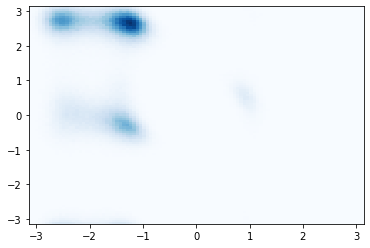

In [5]:
plt.hist2d(*np.concatenate(dihedrals).T, bins=100, cmap='Blues', );

The so called 'free energy landscape' can be computed using the Boltzmann distribution

$$ p \approx exp(-U/k_B T) \leftrightarrow U = -k_B T ln(p)$$

Since we do not know the partition function, we can only show relative free energies. Please note that histogram only approximates the probability distribution, we assume that our data is in equilibrium sample.

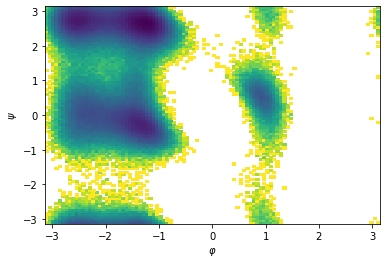

In [6]:
plt.hist2d(np.concatenate(dihedrals)[:, 0], 
           np.concatenate(dihedrals)[:, 1], 
           bins=100, cmap='viridis_r', 
           norm=plt.matplotlib.colors.LogNorm())
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\psi$');

In [7]:
# compute the 2D histogram with numpy using 256 bins
hist, x_edges, y_edges = np.histogram2d(np.concatenate(dihedrals)[:, 0], 
                                        np.concatenate(dihedrals)[:, 1],
                                        256);

In [8]:
# note that the histogram function gives back "edges" of our bins, i.e.
# the left and right boundary of each bin. 
# that is one more than we have counts in each dimension.
hist.shape, x_edges.shape, y_edges.shape

((256, 256), (257,), (257,))

In [9]:
# find the indices of the histogram where the histogram is max
# as `hist` is 2 dimensional, we get two indices
# one for each dimension

x_max_ind, y_max_ind = np.where(hist == hist.max())
print(x_max_ind, y_max_ind)

# compute the center of the bins in both x and y direction
x_bin = x_edges[x_max_ind[0]:x_max_ind[0]+2]
x_max = x_bin.mean()

y_bin = y_edges[y_max_ind[0]:y_max_ind[0]+2]
y_max = y_bin.mean()

[78] [235]


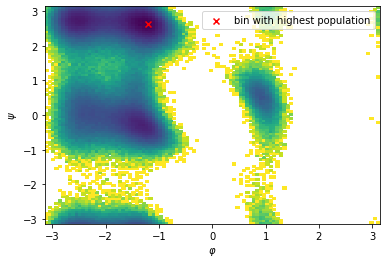

In [10]:
plt.hist2d(np.concatenate(dihedrals)[:, 0], 
           np.concatenate(dihedrals)[:, 1], 
           bins=100, cmap='viridis_r', 
           norm=plt.matplotlib.colors.LogNorm())
plt.scatter(x_max, y_max, marker='x', color='r', label='bin with highest population')

plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\psi$')
plt.legend();